<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [9]:
# Notebook A/B Test of Ads

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns

In [3]:
filename = "AdSmartABdata - AdSmartABdata.csv"
df = pd.read_csv(filename)

#data comes from kaggle csv. get array info. There are no null values in the array. 
info_df = df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB
None


In [4]:
#create the pandas DataFrame
df1 = df[['experiment','yes']]
  
# print
df1.head()

,experiment,yes
0,exposed,0
1,exposed,0
2,exposed,0
3,control,0
4,control,0


In [5]:
# Creating dfs for each group
df_control = df[df.experiment =='control']
df_exposed = df[df.experiment =='exposed']
#now let's see how the two groups of users compare

In [6]:
#run ds on the control group
df_control.describe()

,hour,platform_os,yes,no
count,4071.000000,4071.000000,4071.000000,4071.000000
mean,12.499140,5.924343,0.064849,0.079096
std,5.331095,0.264481,0.246289,0.269922
min,0.000000,5.000000,0.000000,0.000000
25%,9.000000,6.000000,0.000000,0.000000
50%,15.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,6.000000,1.000000,1.000000


In [7]:
#run ds on the exposed group
df_exposed.describe()

,hour,platform_os,yes,no
count,4006.000000,4006.000000,4006.000000,4006.000000
mean,10.716675,5.970295,0.076885,0.087119
std,5.986323,0.171259,0.266442,0.282045
min,0.000000,5.000000,0.000000,0.000000
25%,6.000000,6.000000,0.000000,0.000000
50%,10.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000


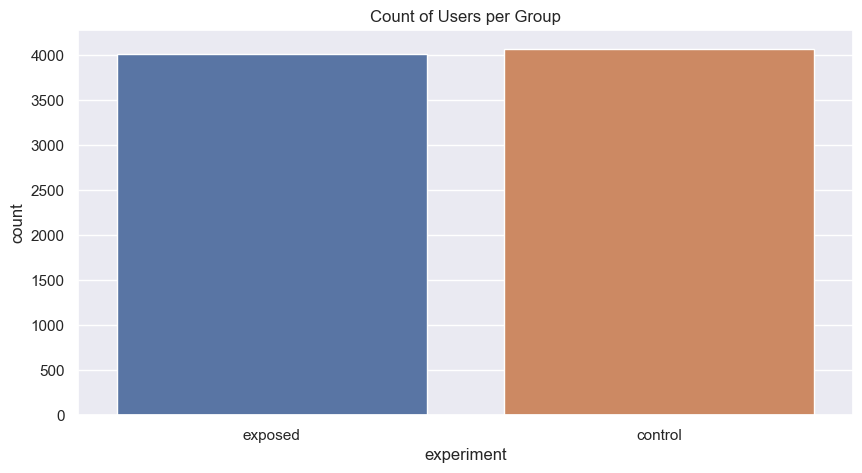

In [10]:
#Figure 1 - visualize the control and exposed groups
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='experiment', data=df)
plt.title('Count of Users per Group')
plt.show()
plt.close()
#they are approx same size

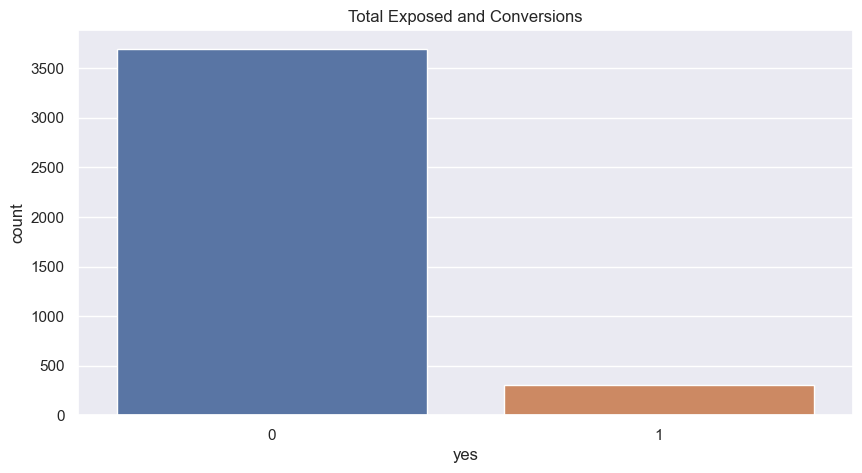

In [11]:
#Figure 2
#visualize the total exposed group (experimental ad) and the conversions (clicked yes)
sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(x='yes', data=df_exposed)
plt.title('Total Exposed and Conversions')
plt.show()
plt.close()

In [13]:
#let's plot the distribution of the total responses (yes and no) in the exposed group 
fig = plt.figure(figsize=(8, 6))
sns.distplot(df_exposed['total'], hist=False, kde_kws={"shade": True})

KeyError: 'total'

<Figure size 800x600 with 0 Axes>

In [15]:
#let's plot the distribution of the total responses (yes and no) in the control group 
fig = plt.figure(figsize=(8, 6))
sns.distplot(df_control['total'], hist=False, kde_kws={"shade": True})

KeyError: 'total'

<Figure size 800x600 with 0 Axes>